Importing libraries

In [1049]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import *
from urllib.request import urlopen
import geojson
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import plotly.graph_objects as go
from statsmodels.tsa.holtwinters import Holt


Reading the data

In [1050]:
emissions = pd.read_csv('2005-2022-local-authority-ghg-emissions-csv-dataset.csv')

In [1051]:
emissions.columns=emissions.columns.str.strip()

In [1052]:
emissions.head()

,Country,Country Code,Region,Region Code,Second Tier Authority,Local Authority,Local Authority Code,Calendar Year,LA GHG Sector,LA GHG Sub-sector,Greenhouse gas,Territorial emissions (kt CO2e),CO2 emissions within the scope of influence of LAs (kt CO2),Mid-year Population (thousands),Area (km2)
0,England,E92000001,North East,E12000001,Hartlepool,Hartlepool,E06000001,2005,Agriculture,Agriculture Electricity,CO2,1.678178,1.678178,90.457,98.3466
1,England,E92000001,North East,E12000001,Hartlepool,Hartlepool,E06000001,2005,Agriculture,Agriculture Electricity,CH4,0.052700,0.000000,90.457,98.3466
2,England,E92000001,North East,E12000001,Hartlepool,Hartlepool,E06000001,2005,Agriculture,Agriculture Electricity,N2O,0.006770,0.000000,90.457,98.3466
3,England,E92000001,North East,E12000001,Hartlepool,Hartlepool,E06000001,2005,Agriculture,Agriculture Gas,CO2,0.311375,0.311375,90.457,98.3466
4,England,E92000001,North East,E12000001,Hartlepool,Hartlepool,E06000001,2005,Agriculture,Agriculture Gas,CH4,0.010500,0.000000,90.457,98.3466


Understanding the data

In [1053]:
emissions.columns

Index(['Country', 'Country Code', 'Region', 'Region Code',
       'Second Tier Authority', 'Local Authority', 'Local Authority Code',
       'Calendar Year', 'LA GHG Sector', 'LA GHG Sub-sector', 'Greenhouse gas',
       'Territorial emissions (kt CO2e)',
       'CO2 emissions within the scope of influence of LAs (kt CO2)',
       'Mid-year Population (thousands)', 'Area (km2)'],
      dtype='object')

In [1054]:
emissions.shape

(533016, 15)

In [1055]:
emissions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 533016 entries, 0 to 533015
Data columns (total 15 columns):
 #   Column                                                       Non-Null Count   Dtype  
---  ------                                                       --------------   -----  
 0   Country                                                      533016 non-null  object 
 1   Country Code                                                 532602 non-null  object 
 2   Region                                                       533016 non-null  object 
 3   Region Code                                                  532602 non-null  object 
 4   Second Tier Authority                                        532602 non-null  object 
 5   Local Authority                                              533016 non-null  object 
 6   Local Authority Code                                         533016 non-null  object 
 7   Calendar Year                                                5330

Cleaning the data 

In [1056]:
emissions['Calendar Year'] = pd.to_datetime(emissions['Calendar Year'], format='%Y').dt.year

In [1057]:
emissions.head()

,Country,Country Code,Region,Region Code,Second Tier Authority,Local Authority,Local Authority Code,Calendar Year,LA GHG Sector,LA GHG Sub-sector,Greenhouse gas,Territorial emissions (kt CO2e),CO2 emissions within the scope of influence of LAs (kt CO2),Mid-year Population (thousands),Area (km2)
0,England,E92000001,North East,E12000001,Hartlepool,Hartlepool,E06000001,2005,Agriculture,Agriculture Electricity,CO2,1.678178,1.678178,90.457,98.3466
1,England,E92000001,North East,E12000001,Hartlepool,Hartlepool,E06000001,2005,Agriculture,Agriculture Electricity,CH4,0.052700,0.000000,90.457,98.3466
2,England,E92000001,North East,E12000001,Hartlepool,Hartlepool,E06000001,2005,Agriculture,Agriculture Electricity,N2O,0.006770,0.000000,90.457,98.3466
3,England,E92000001,North East,E12000001,Hartlepool,Hartlepool,E06000001,2005,Agriculture,Agriculture Gas,CO2,0.311375,0.311375,90.457,98.3466
4,England,E92000001,North East,E12000001,Hartlepool,Hartlepool,E06000001,2005,Agriculture,Agriculture Gas,CH4,0.010500,0.000000,90.457,98.3466


In [1058]:
emissions.isnull().sum()

Country                                                          0
Country Code                                                   414
Region                                                           0
Region Code                                                    414
Second Tier Authority                                          414
Local Authority                                                  0
Local Authority Code                                             0
Calendar Year                                                    0
LA GHG Sector                                                    0
LA GHG Sub-sector                                                0
Greenhouse gas                                                   0
Territorial emissions (kt CO2e)                                  0
CO2 emissions within the scope of influence of LAs (kt CO2)      0
Mid-year Population (thousands)                                414
Area (km2)                                                    

In [1059]:
print (emissions.iloc[[437067]])

            Country Country Code       Region Region Code  \
437067  Unallocated          NaN  Unallocated         NaN   

       Second Tier Authority  \
437067                   NaN   

                                          Local Authority  \
437067  Large elec users (high voltage lines) unknown ...   

       Local Authority Code  Calendar Year LA GHG Sector  \
437067            LargeElec           2005      Industry   

           LA GHG Sub-sector Greenhouse gas  Territorial emissions (kt CO2e)  \
437067  Industry Electricity            N2O                        14.058707   

        CO2 emissions within the scope of influence of LAs (kt CO2)  \
437067                                                0.0             

        Mid-year Population (thousands)  Area (km2)  
437067                              NaN         NaN  


In [1061]:
unallocated_emissions=emissions[(emissions['Region'] == 'Unallocated')]

In [1174]:
print(unallocated_emissions['Territorial emissions (kt CO2e)'].sum())
print(emissions['Territorial emissions (kt CO2e)'].sum())
print((73039.808264529/9052903.789893107)*100)

73039.808264529
9052903.789893107
0.8068108306427879


In [1063]:
emissions = emissions.drop(emissions[emissions['Country'] == 'Unallocated'].index)

In [1064]:
emissions.isnull().sum()

Country                                                        0
Country Code                                                   0
Region                                                         0
Region Code                                                    0
Second Tier Authority                                          0
Local Authority                                                0
Local Authority Code                                           0
Calendar Year                                                  0
LA GHG Sector                                                  0
LA GHG Sub-sector                                              0
Greenhouse gas                                                 0
Territorial emissions (kt CO2e)                                0
CO2 emissions within the scope of influence of LAs (kt CO2)    0
Mid-year Population (thousands)                                0
Area (km2)                                                     0
dtype: int64

Calculating total emissions

In [1065]:
overall_emissions=emissions['Territorial emissions (kt CO2e)'].sum()
print (overall_emissions)

9052903.789893107


Total emissions by country

In [1066]:
Countries = emissions.groupby(by="Country")[['Territorial emissions (kt CO2e)','Area (km2)', 'Mid-year Population (thousands)']].sum().reset_index()
Countries.head()

,Country,Territorial emissions (kt CO2e),Area (km2),Mid-year Population (thousands)
0,England,7.135814e+06,1.995097e+08,8.018597e+07
1,Northern Ireland,3.946021e+05,2.061058e+07,2.755064e+06
2,Scotland,8.896805e+05,1.177576e+08,7.953526e+06
3,Wales,6.328074e+05,3.158722e+07,4.589141e+06


In [1067]:
Countries['Territorial emissions (millions kt CO2e)']= Countries['Territorial emissions (kt CO2e)']/1000000

Text(0.5, 1.0, 'Territorial Emissions per Country')

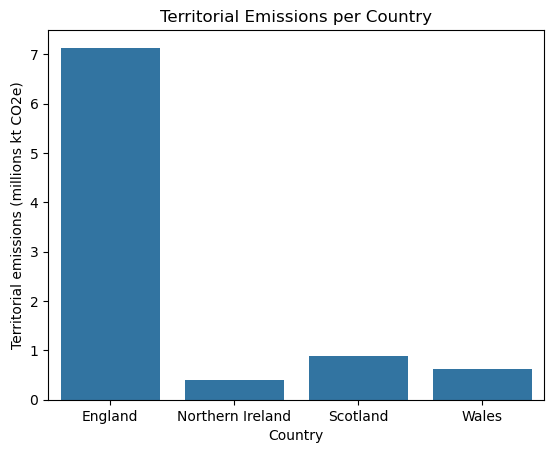

In [1175]:
sns.barplot(data=Countries, x='Country', y='Territorial emissions (millions kt CO2e)')
plt.title('Territorial Emissions per Country')

Caculating normalised and percentage emissions

In [1069]:
Countries['Emissions normalised by area (kt CO2e)']= Countries['Territorial emissions (kt CO2e)']/Countries['Area (km2)']

In [1070]:
Countries['Emissions normalised by population (kt CO2e)']= Countries['Territorial emissions (kt CO2e)']/Countries['Mid-year Population (thousands)']

In [1071]:
Countries['Percentage emissions']= (Countries['Territorial emissions (kt CO2e)']/overall_emissions)*100
print (Countries['Percentage emissions'])

0    78.823480
1     4.358845
2     9.827571
3     6.990104
Name: Percentage emissions, dtype: float64


Text(0.5, 1.0, 'Territorial Emissions Normalised by Area per Country')

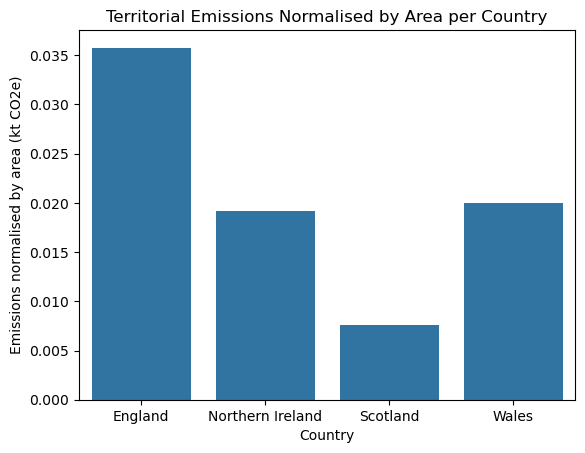

In [1176]:
sns.barplot(data=Countries, x='Country', y='Emissions normalised by area (kt CO2e)')
plt.title('Territorial Emissions Normalised by Area per Country')


Text(0.5, 1.0, 'Territorial Emissions Normalised by Population per Region')

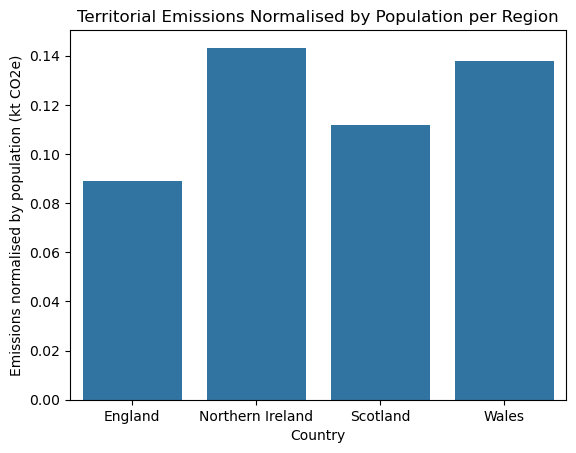

In [1177]:
sns.barplot(data=Countries, x='Country', y='Emissions normalised by population (kt CO2e)')
plt.title('Territorial Emissions Normalised by Population per Region')

Creating a seperate dataframe for England data

In [1075]:
England= emissions[emissions.Country == 'England']

In [1076]:
England.head()

,Country,Country Code,Region,Region Code,Second Tier Authority,Local Authority,Local Authority Code,Calendar Year,LA GHG Sector,LA GHG Sub-sector,Greenhouse gas,Territorial emissions (kt CO2e),CO2 emissions within the scope of influence of LAs (kt CO2),Mid-year Population (thousands),Area (km2)
0,England,E92000001,North East,E12000001,Hartlepool,Hartlepool,E06000001,2005,Agriculture,Agriculture Electricity,CO2,1.678178,1.678178,90.457,98.3466
1,England,E92000001,North East,E12000001,Hartlepool,Hartlepool,E06000001,2005,Agriculture,Agriculture Electricity,CH4,0.052700,0.000000,90.457,98.3466
2,England,E92000001,North East,E12000001,Hartlepool,Hartlepool,E06000001,2005,Agriculture,Agriculture Electricity,N2O,0.006770,0.000000,90.457,98.3466
3,England,E92000001,North East,E12000001,Hartlepool,Hartlepool,E06000001,2005,Agriculture,Agriculture Gas,CO2,0.311375,0.311375,90.457,98.3466
4,England,E92000001,North East,E12000001,Hartlepool,Hartlepool,E06000001,2005,Agriculture,Agriculture Gas,CH4,0.010500,0.000000,90.457,98.3466


In [1077]:
summary_stats = England.groupby('Region')['Territorial emissions (kt CO2e)'].agg(['mean', 'std'])
print (summary_stats)

                               mean         std
Region                                         
East Midlands             13.743580   58.620017
East of England           12.536163   38.495859
London                    16.131161   60.574206
North East                26.167674  206.951342
North West                18.821724   66.197189
South East                11.103699   37.768971
South West                18.075049   65.434220
West Midlands             16.707027   62.334524
Yorkshire and the Humber  37.675902  218.247020


In [1078]:
summary_stats = England.groupby('LA GHG Sector')['Territorial emissions (kt CO2e)'].agg(['mean', 'std'])
print (summary_stats)

                    mean         std
LA GHG Sector                       
Agriculture     8.604537   44.033681
Commercial     18.526165   62.338078
Domestic       38.430702   85.683265
Industry       20.362512  174.756016
LULUCF         -0.096408   26.401112
Public Sector   5.867830   15.452158
Transport      26.278459   68.139317
Waste          17.906179   40.391343


In [1079]:
region_emissions=England.groupby(["Calendar Year", "Region"])[['Territorial emissions (kt CO2e)']].sum().reset_index()

In [1081]:
England_areas=England.groupby(by="Region")[['Territorial emissions (kt CO2e)','Area (km2)','Mid-year Population (thousands)']].sum().reset_index()

In [1083]:
England_areas['Emissions normalised by area in England (kt CO2e)']= England_areas['Territorial emissions (kt CO2e)']/England_areas['Area (km2)']

In [1084]:
England_areas['Emissions normalised by population in England (kt CO2e)']= England_areas['Territorial emissions (kt CO2e)']/England_areas['Mid-year Population (thousands)']

In [1085]:
England_areas.head(9)

,Region,Territorial emissions (kt CO2e),Area (km2),Mid-year Population (thousands),Emissions normalised by area in England (kt CO2e),Emissions normalised by population in England (kt CO2e)
0,East Midlands,7.091413e+05,2.335862e+07,6.828303e+06,0.030359,0.103853
1,East of England,8.260956e+05,2.894425e+07,8.813139e+06,0.028541,0.093735
2,London,7.559546e+05,2.293210e+06,1.183934e+07,0.329649,0.063851
3,North East,4.661509e+05,1.299201e+07,3.900758e+06,0.035880,0.119503
4,North West,1.005720e+06,2.286582e+07,1.094166e+07,0.043984,0.091917
5,South East,1.043614e+06,2.875908e+07,1.298131e+07,0.036288,0.080394
6,South West,7.156273e+05,3.660503e+07,8.099137e+06,0.019550,0.088358
7,West Midlands,7.520501e+05,1.975207e+07,8.605825e+06,0.038074,0.087388
8,Yorkshire and the Humber,8.614595e+05,2.393957e+07,8.176504e+06,0.035985,0.105358


Text(0.5, 1.0, 'Territorial Emissions per Region')

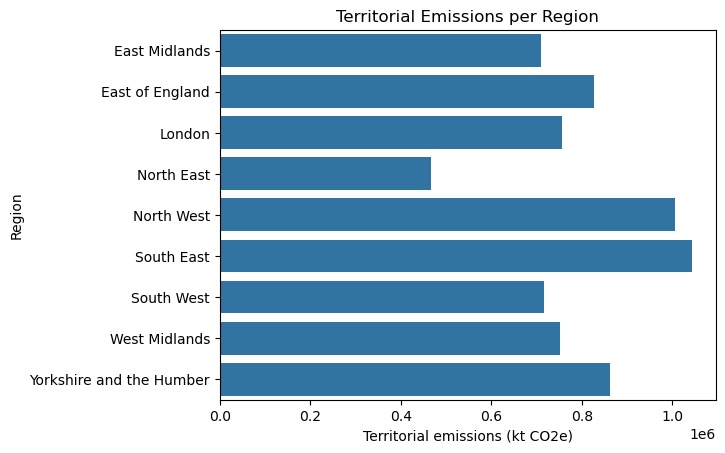

In [1180]:
sns.barplot(data=England_areas, x='Territorial emissions (kt CO2e)', y='Region', orient = 'h')
plt.title('Territorial Emissions per Region')

Text(0.5, 1.0, 'Territorial Emissions Normalised by Population per Region')

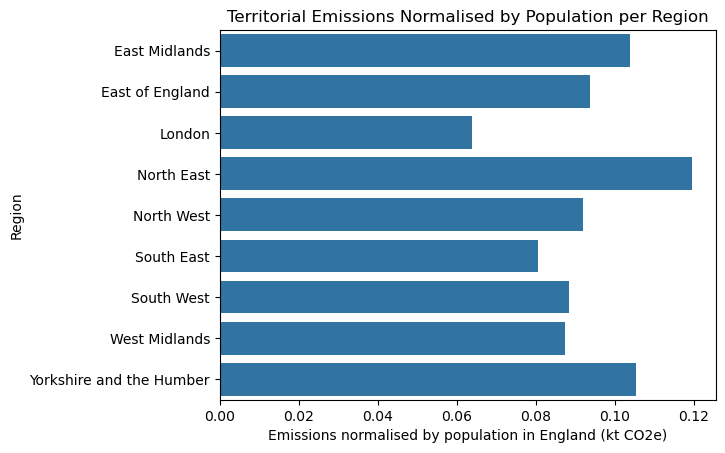

In [1179]:
sns.barplot(data=England_areas, x='Emissions normalised by population in England (kt CO2e)', y='Region', orient = 'h')
plt.title('Territorial Emissions Normalised by Population per Region')

Text(0.5, 1.0, 'Territorial Emissions Normalised by Area per Region')

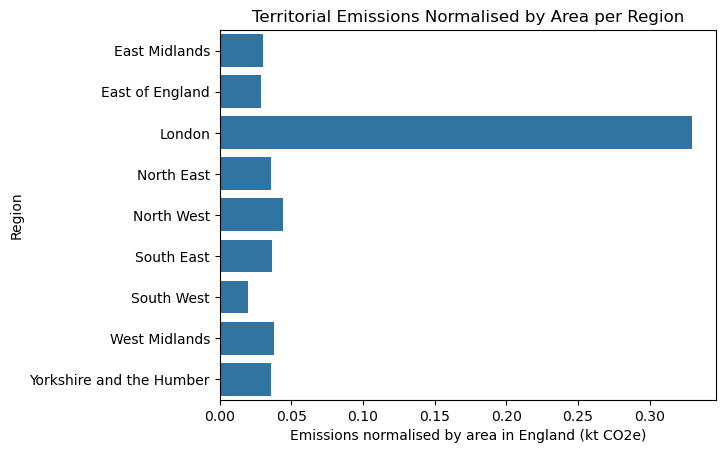

In [1088]:
sns.barplot(data=England_areas, x='Emissions normalised by area in England (kt CO2e)', y='Region', orient = 'h')
plt.title('Territorial Emissions Normalised by Area per Region')

Emissions by region over time

In [1089]:
England_areas_time=England.groupby(["Region","Calendar Year"])[['Territorial emissions (kt CO2e)']].sum().reset_index()

In [1090]:
England_areas_time.head()

,Region,Calendar Year,Territorial emissions (kt CO2e)
0,East Midlands,2005,48764.545382
1,East Midlands,2006,48328.114232
2,East Midlands,2007,46591.475120
3,East Midlands,2008,45133.290077
4,East Midlands,2009,41672.714592


In [1091]:
England_areas_time['Territorial emissions (thousands kt CO2e)']= England_areas_time['Territorial emissions (kt CO2e)']/1000

In [1092]:
area_time = (
    ggplot(England_areas_time, aes(x='Calendar Year', 
                                  y='Territorial emissions (thousands kt CO2e)', 
                                  color='Region')) +
    geom_line(aes(group='Region'), size=1) +
    ggtitle('Territorial Emissions by Region 2005-2022'))

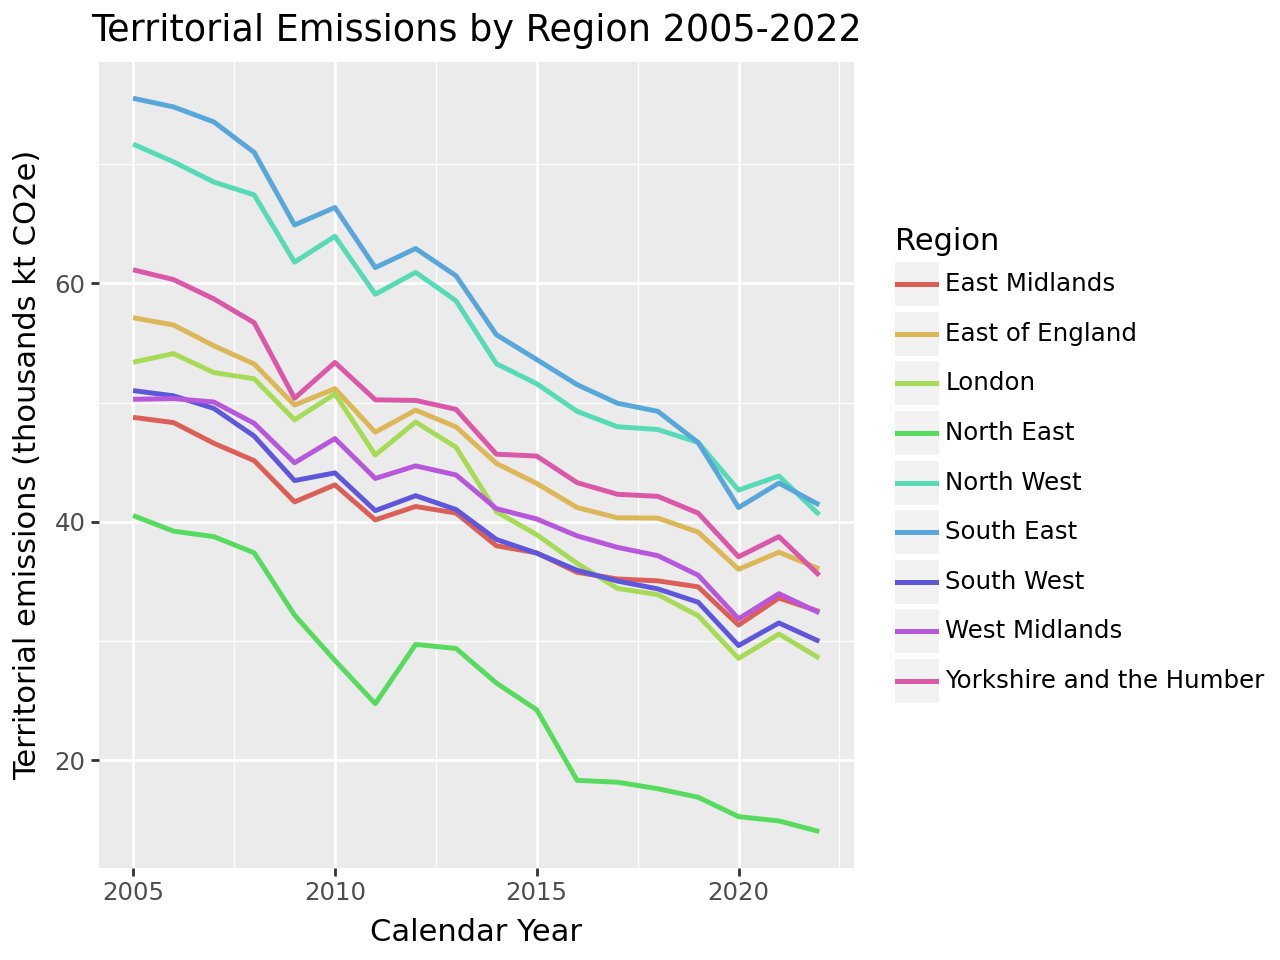

In [1093]:
area_time.show()

Emissions mapped by area

In [1606]:
England_map=England.groupby(["Region", "Region Code"])[['Territorial emissions (kt CO2e)']].sum().reset_index()

In [1609]:
print(England_map['Territorial emissions (kt CO2e)'].min())
print(England_map['Territorial emissions (kt CO2e)'].max())

466150.937187889
1043614.484814595


In [1685]:
with open('England_regions2.geojson') as file:

    England_Regions = geojson.load(file)


#Add id to Geojson

properties0 = England_Regions["features"][0]["properties"]

for feature in England_Regions["features"]:

    feature["id"] = feature["properties"]["rgn19cd"]

    properties1 = England_Regions["features"][0].keys()


In [1684]:
England_map["id"]=England_map["Region Code"]
England_map.head()

,Region,Region Code,Territorial emissions (kt CO2e),id
0,East Midlands,E12000004,7.091413e+05,E12000004
1,East of England,E12000006,8.260956e+05,E12000006
2,London,E12000007,7.559546e+05,E12000007
3,North East,E12000001,4.661509e+05,E12000001
4,North West,E12000002,1.005720e+06,E12000002


In [1612]:
map = px.choropleth(

    England_map,

    locations="id",

    color="Territorial emissions (kt CO2e)",

    geojson=England_Regions,

    range_color=(466151, 1043614),

    color_continuous_scale='aggrnyl',

    hover_name="Region",

    scope ="europe",

    hover_data=["Territorial emissions (kt CO2e)"],

    title="Choropleth of Territorial Emissions by Region",

)

map.update_geos(fitbounds="locations", visible=False)

map.show()

In [1613]:
England_region_eq=England.groupby(["Region", "Greenhouse gas" ])['Territorial emissions (kt CO2e)'].sum().reset_index()

Sector

In [1616]:
England_sector=England.groupby(by="LA GHG Sector")['Territorial emissions (kt CO2e)'].sum().reset_index()

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'Agriculture'),
  Text(1, 0, 'Commercial'),
  Text(2, 0, 'Domestic'),
  Text(3, 0, 'Industry'),
  Text(4, 0, 'LULUCF'),
  Text(5, 0, 'Public Sector'),
  Text(6, 0, 'Transport'),
  Text(7, 0, 'Waste')])

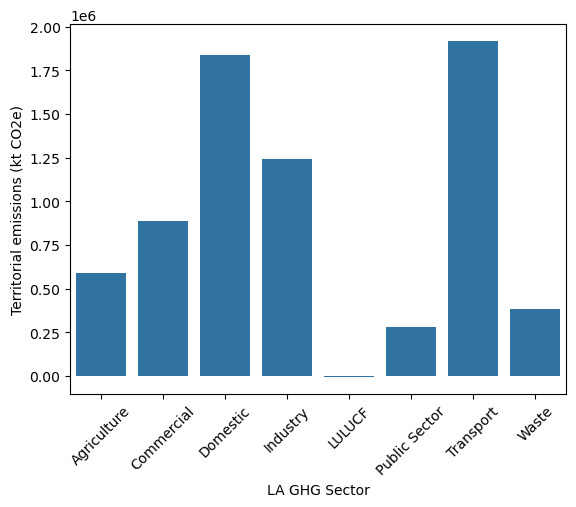

In [1618]:
sns.barplot(data=England_sector, x='LA GHG Sector', y='Territorial emissions (kt CO2e)')
plt.xticks(rotation=45)
#LULUCF is negative so how to show that on a bar chat???

In [1619]:
England_sector['Total emissions']=England_sector['Territorial emissions (kt CO2e)'].sum()

In [1686]:
England_sector['Percentage emissions per sector (kt CO2e)']= (England_sector['Territorial emissions (kt CO2e)']/ England_sector['Total emissions'])*100

In [1688]:
England_sector.head(9)

,LA GHG Sector,Territorial emissions (kt CO2e),Total emissions,Percentage emissions per sector (kt CO2e)
0,Agriculture,5.918803e+05,7.135814e+06,8.294503
1,Commercial,8.873663e+05,7.135814e+06,12.435390
2,Domestic,1.840754e+06,7.135814e+06,25.795989
3,Industry,1.242622e+06,7.135814e+06,17.413883
4,LULUCF,-6.680102e+03,7.135814e+06,-0.093614
5,Public Sector,2.810573e+05,7.135814e+06,3.938686
6,Transport,1.917198e+06,7.135814e+06,26.867258
7,Waste,3.816165e+05,7.135814e+06,5.347904


Text(0.5, 1.0, 'Percentage Emissions by Sector')

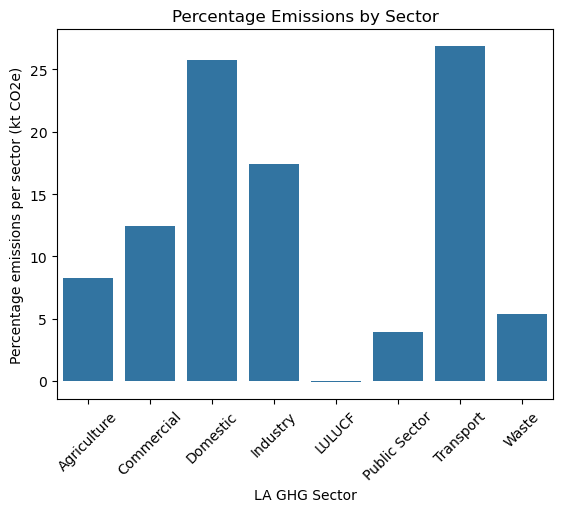

In [1690]:
sns.barplot(data=England_sector, x='LA GHG Sector', y='Percentage emissions per sector (kt CO2e)')
plt.xticks(rotation=45)
plt.title('Percentage Emissions by Sector')


In [1623]:
sector_time=England.groupby(["LA GHG Sector","Calendar Year"])['Territorial emissions (kt CO2e)'].sum().reset_index()

In [1691]:
sector_time['Territorial emissions (thousands kt CO2e)']= sector_time['Territorial emissions (kt CO2e)']/1000

In [1625]:
sector_line_time = (
    ggplot(sector_time, aes(x='Calendar Year', 
                                  y='Territorial emissions (thousands kt CO2e)', 
                                  color='LA GHG Sector')) +
    geom_line(aes(group='LA GHG Sector'), size=1) +
    ggtitle('Emissions by Sector 2005-2022'))

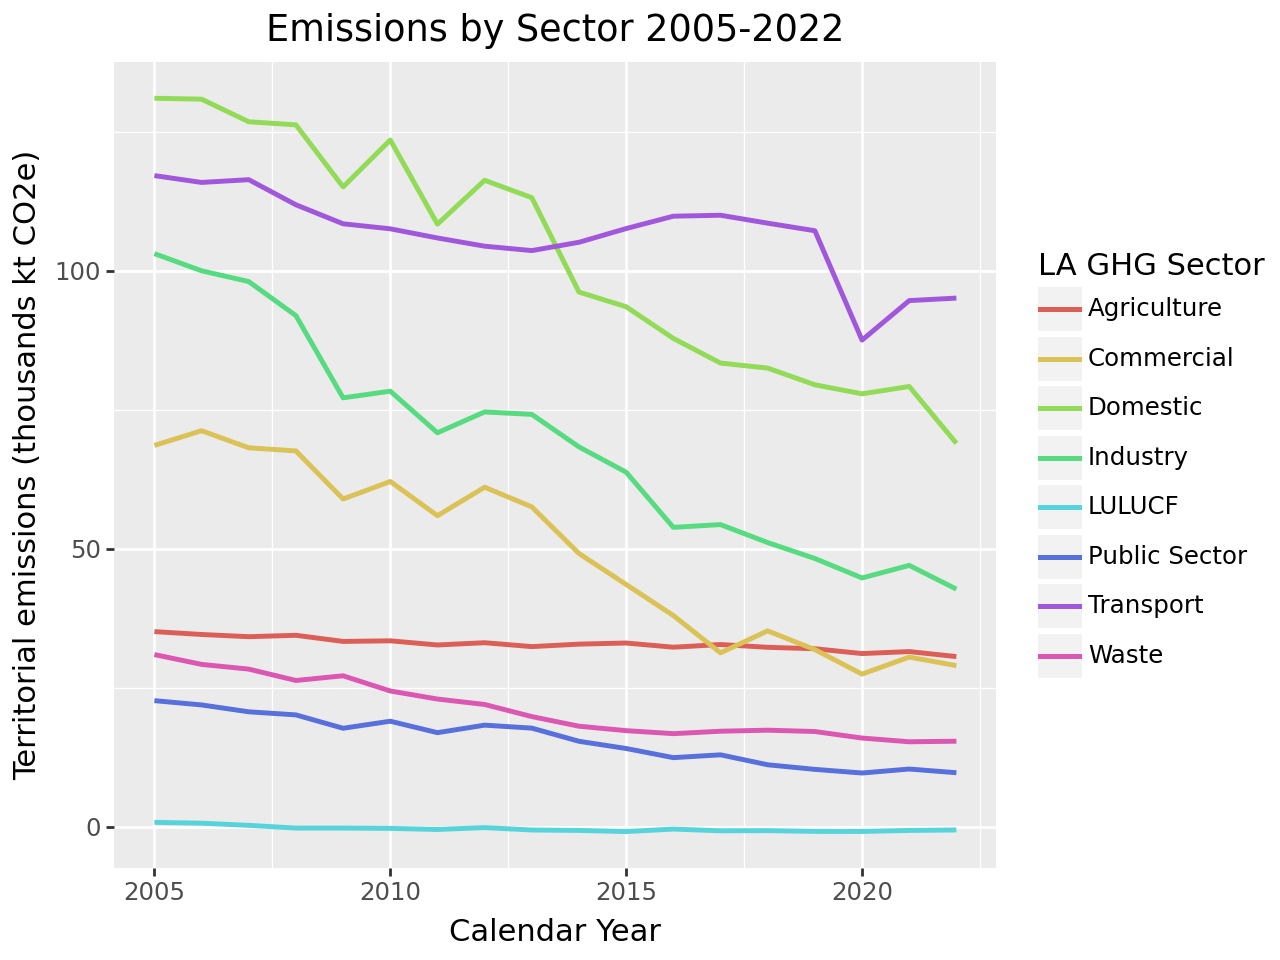

In [1626]:
sector_line_time.show()


In [1627]:
England_sector_eq=England.groupby(["LA GHG Sector", "Greenhouse gas" ])['Territorial emissions (kt CO2e)'].sum().reset_index()

In [1630]:
England_sector_eq['Territorial emissions (millions kt CO2e)']= England_sector_eq['Territorial emissions (kt CO2e)']/1000000

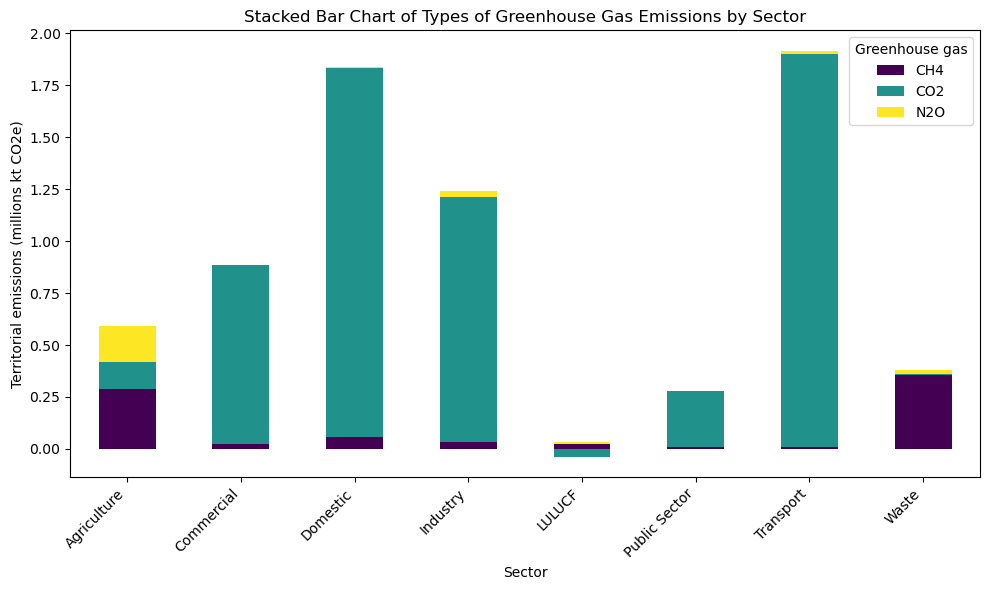

In [1692]:
#Pivot the data to have sectors as rows and gases as columns
England_sector_eq_pivot = England_sector_eq.pivot(index='LA GHG Sector', columns='Greenhouse gas', values='Territorial emissions (millions kt CO2e)')

# Plot the stacked bar chart
ax = England_sector_eq_pivot.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
ax.set_title('Stacked Bar Chart of Types of Greenhouse Gas Emissions by Sector')
ax.set_xlabel('Sector')
ax.set_ylabel('Territorial emissions (millions kt CO2e)')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.tight_layout()

plt.show()



In [1633]:
England_region_eq['Territorial emissions (millions kt CO2e)']= England_region_eq['Territorial emissions (kt CO2e)']/1000000

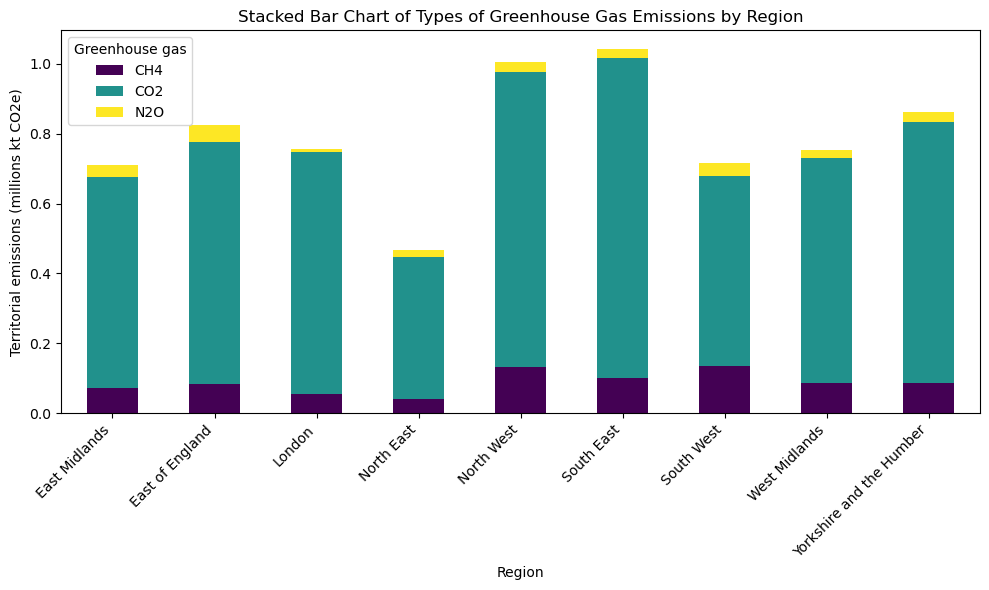

In [1693]:
# Pivot the data to have sectors as rows and gases as columns
England_region_eq_pivot = England_region_eq.pivot(index='Region', columns='Greenhouse gas', values='Territorial emissions (millions kt CO2e)')

# Plot the stacked bar chart
ax = England_region_eq_pivot.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
ax.set_title('Stacked Bar Chart of Types of Greenhouse Gas Emissions by Region')
ax.set_xlabel('Region')
ax.set_ylabel('Territorial emissions (millions kt CO2e)')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.tight_layout()

plt.show()


By area by sector

In [1635]:
England_area_sector=England.groupby(["Region","LA GHG Sector"])['Territorial emissions (kt CO2e)'].sum().reset_index()

In [1636]:
England_area_sector['Territorial emissions (thousands kt CO2e)']= England_area_sector['Territorial emissions (kt CO2e)']/1000

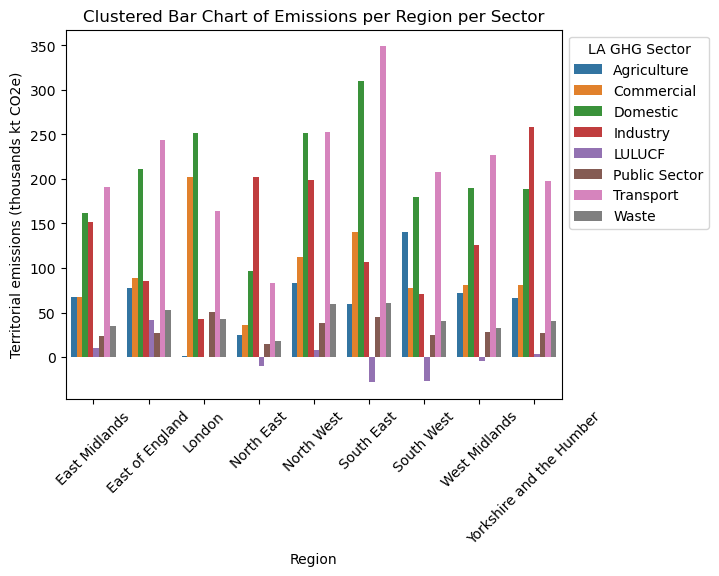

In [1696]:
cb_s_a=sns.barplot(data=England_area_sector, x='Region', y='Territorial emissions (thousands kt CO2e)', hue='LA GHG Sector'   )
plt.xticks(rotation=45)
cb_s_a.set_xlabel('Region')
cb_s_a.set_ylabel('Territorial emissions (thousands kt CO2e)')
cb_s_a.set_title('Clustered Bar Chart of Emissions per Region per Sector')
sns.move_legend(cb_s_a, "upper left", bbox_to_anchor=(1, 1))

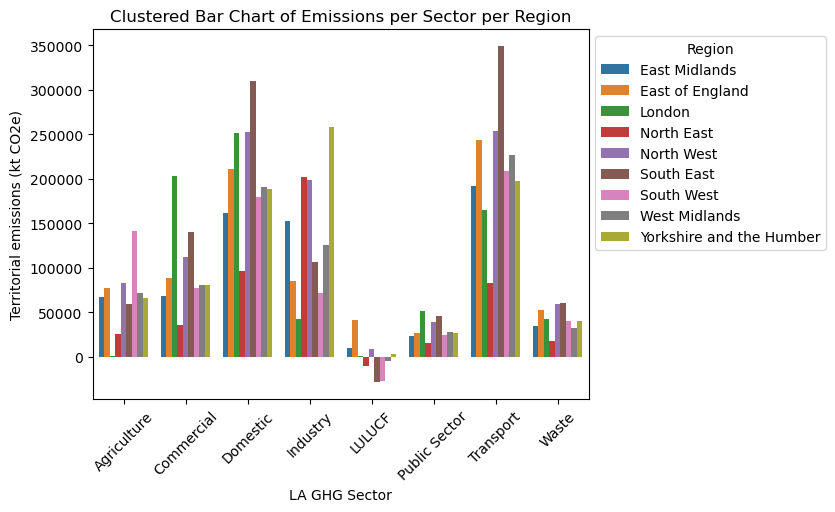

In [1699]:
cb_a_s=sns.barplot(data=England_area_sector, x='LA GHG Sector', y='Territorial emissions (kt CO2e)', hue='Region')
plt.xticks(rotation=45)
cb_a_s.set_title('Clustered Bar Chart of Emissions per Sector per Region')
sns.move_legend(cb_a_s, "upper left", bbox_to_anchor=(1, 1))

Separate dataframe for Transport

In [1650]:
transport_data = England[emissions["LA GHG Sector"] == 'Transport']

C:\Users\jmace\AppData\Local\Temp\ipykernel_12284\479769361.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [1651]:
transport_region=transport_data.groupby(["Region","LA GHG Sector", "LA GHG Sub-sector"])['Territorial emissions (kt CO2e)'].sum().reset_index()

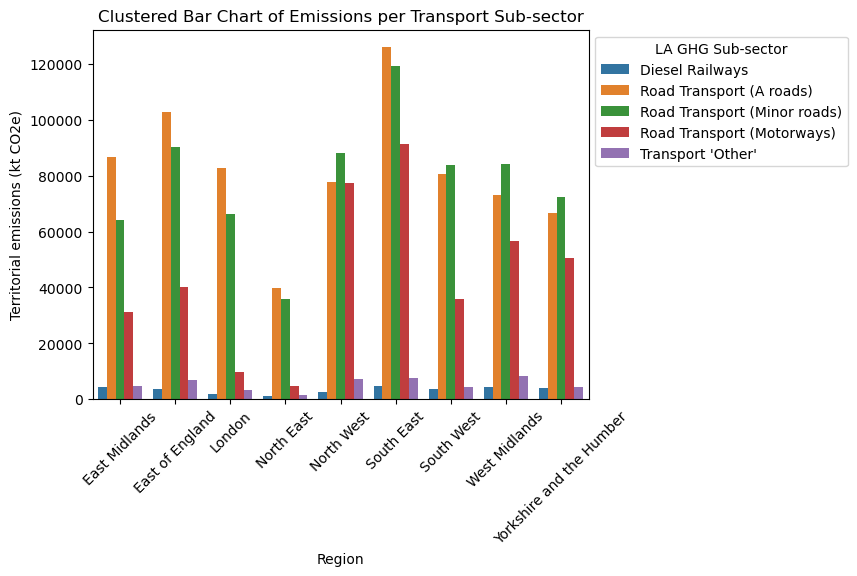

In [1701]:
cb_r_t=sns.barplot(data=transport_region, x='Region', y='Territorial emissions (kt CO2e)', hue='LA GHG Sub-sector')
plt.xticks(rotation=45)
cb_r_t.set_title('Clustered Bar Chart of Emissions per Transport Sub-sector')
sns.move_legend(cb_r_t, "upper left", bbox_to_anchor=(1, 1)) 

Separate dataframe for Domestic

In [1653]:
domestic_data= England[emissions["LA GHG Sector"] == 'Domestic']

C:\Users\jmace\AppData\Local\Temp\ipykernel_12284\3278219617.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [1654]:
domestic_region=domestic_data.groupby(["Region","LA GHG Sector", "LA GHG Sub-sector"])['Territorial emissions (kt CO2e)'].sum().reset_index()

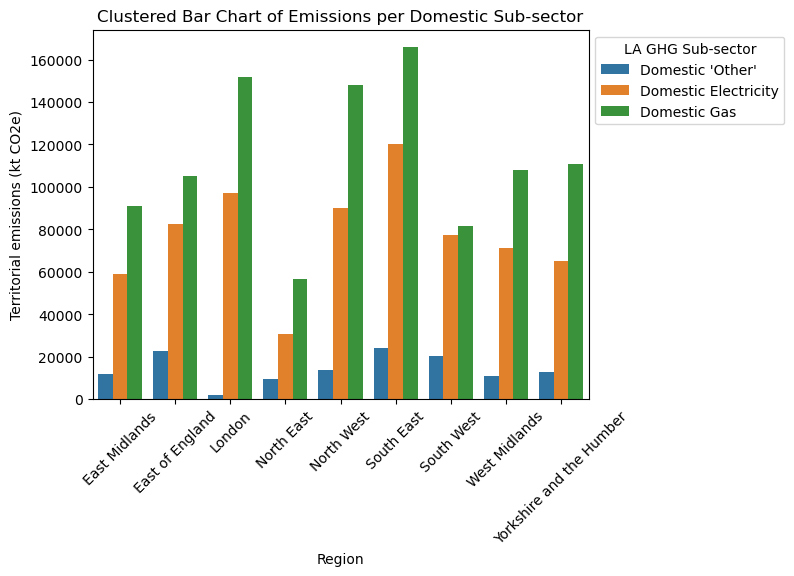

In [1702]:
cb_r_d=sns.barplot(data=domestic_region, x='Region', y='Territorial emissions (kt CO2e)', hue='LA GHG Sub-sector')
plt.xticks(rotation=45)
cb_r_d.set_title('Clustered Bar Chart of Emissions per Domestic Sub-sector')
sns.move_legend(cb_r_d, "upper left", bbox_to_anchor=(1, 1)) 

Separate dataframe for SE

In [1656]:
SE = England[emissions.Region == 'South East']

C:\Users\jmace\AppData\Local\Temp\ipykernel_12284\1291827952.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [1658]:
SE_sector=SE.groupby(["LA GHG Sector"])['Territorial emissions (kt CO2e)'].sum().reset_index()

Text(0.5, 1.0, 'Territorial emissions (kt CO2e) by sector in the South East')

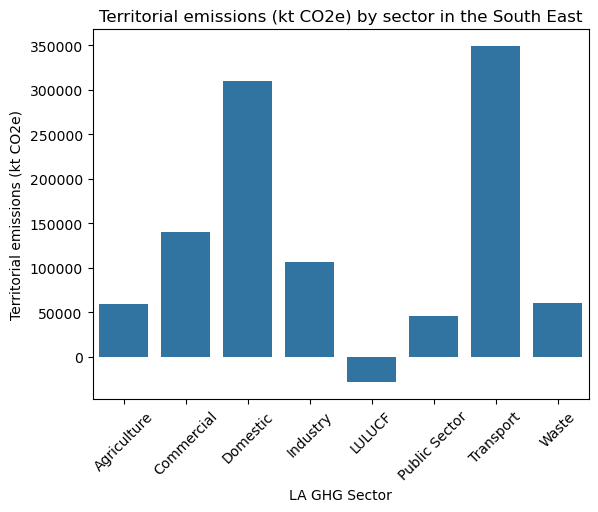

In [1659]:
sns.barplot(data=SE_sector, x='LA GHG Sector', y='Territorial emissions (kt CO2e)')
plt.xticks(rotation=45)
plt.title('Territorial emissions (kt CO2e) by sector in the South East')


In [1660]:
SE_sector_2=SE.groupby(["LA GHG Sector","LA GHG Sub-sector"])['Territorial emissions (kt CO2e)'].sum().reset_index()

In [1662]:
SE_transport = SE[SE["LA GHG Sector"] == 'Transport']

In [1663]:
SE_transport_2=SE_transport.groupby(["LA GHG Sub-sector"])['Territorial emissions (kt CO2e)'].sum().reset_index()

In [1705]:
SE_transport_2['Territorial emissions (thousands kt CO2e)']= SE_transport_2['Territorial emissions (kt CO2e)']/1000

Text(0.5, 1.0, 'Territorial Transport Emissions (kt CO2e) in the South East')

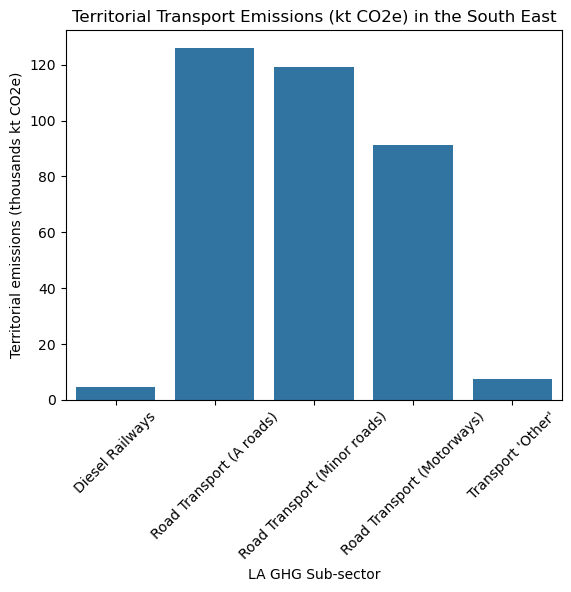

In [1706]:
sns.barplot(data=SE_transport_2, x='LA GHG Sub-sector', y='Territorial emissions (thousands kt CO2e)')
plt.xticks(rotation=45)
plt.title('Territorial Transport Emissions (kt CO2e) in the South East')

In [1665]:
SE_domestic = SE[England["LA GHG Sector"] == 'Domestic']

C:\Users\jmace\AppData\Local\Temp\ipykernel_12284\1641963418.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [1666]:
SE_domestic_2=SE_domestic.groupby(["LA GHG Sub-sector"])['Territorial emissions (kt CO2e)'].sum().reset_index()

Text(0.5, 1.0, 'Territorial Domestic Emissions (kt CO2e) in the South East')

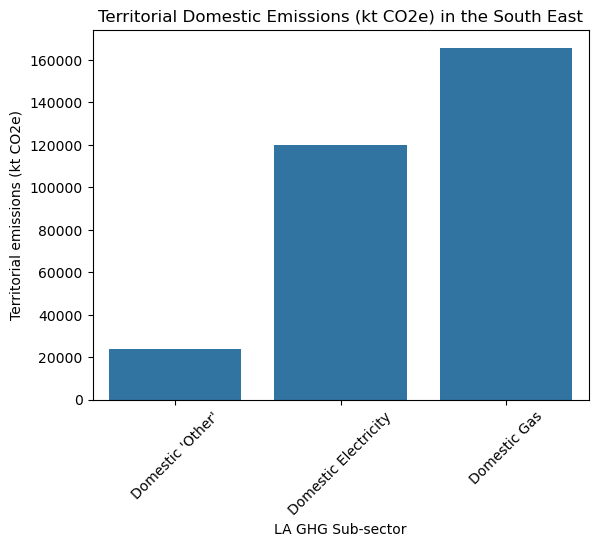

In [1704]:
sns.barplot(data=SE_domestic_2, x='LA GHG Sub-sector', y='Territorial emissions (kt CO2e)')
plt.xticks(rotation=45)
plt.title('Territorial Domestic Emissions (kt CO2e) in the South East')

Correlation matrix and regression

In [1668]:
England_regression = England[['Region','LA GHG Sector','Territorial emissions (kt CO2e)', 'Area (km2)', 'Calendar Year', 'Mid-year Population (thousands)']]

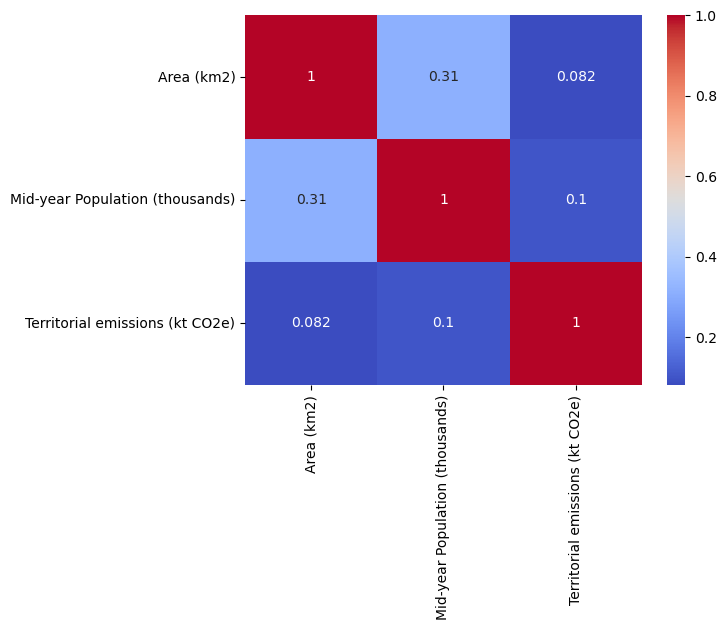

In [1669]:
sns.heatmap(England_regression[['Area (km2)', 'Mid-year Population (thousands)', 'Territorial emissions (kt CO2e)']].corr(), annot=True, cmap='coolwarm')
plt.show()

In [1670]:
#using two variables

# Define independent variables (area, population) and dependent variable (GHG_emissions)
X = England[['Area (km2)', 'Mid-year Population (thousands)']]
y = England['Territorial emissions (kt CO2e)']

# Add a constant to the independent variables for the intercept
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit()

# View the results
print(model.summary())


                                   OLS Regression Results                                  
Dep. Variable:     Territorial emissions (kt CO2e)   R-squared:                       0.013
Model:                                         OLS   Adj. R-squared:                  0.013
Method:                              Least Squares   F-statistic:                     2953.
Date:                             Sun, 15 Dec 2024   Prob (F-statistic):               0.00
Time:                                     13:44:14   Log-Likelihood:            -2.5498e+06
No. Observations:                           437065   AIC:                         5.100e+06
Df Residuals:                               437062   BIC:                         5.100e+06
Df Model:                                        2                                         
Covariance Type:                         nonrobust                                         
                                      coef    std err          t      P>|t|     

In [1671]:
# Convert categorical variables to dummy variables (one-hot encoding)
England_encoded = pd.get_dummies(England_regression, columns=['Region', 'LA GHG Sector'], drop_first=True, dtype=int)

# Preview the data after encoding
England_encoded.head()

,Territorial emissions (kt CO2e),Area (km2),Calendar Year,Mid-year Population (thousands),Region_East of England,Region_London,Region_North East,Region_North West,Region_South East,Region_South West,Region_West Midlands,Region_Yorkshire and the Humber,LA GHG Sector_Commercial,LA GHG Sector_Domestic,LA GHG Sector_Industry,LA GHG Sector_LULUCF,LA GHG Sector_Public Sector,LA GHG Sector_Transport,LA GHG Sector_Waste
0,1.678178,98.3466,2005,90.457,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,0.052700,98.3466,2005,90.457,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,0.006770,98.3466,2005,90.457,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,0.311375,98.3466,2005,90.457,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0.010500,98.3466,2005,90.457,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


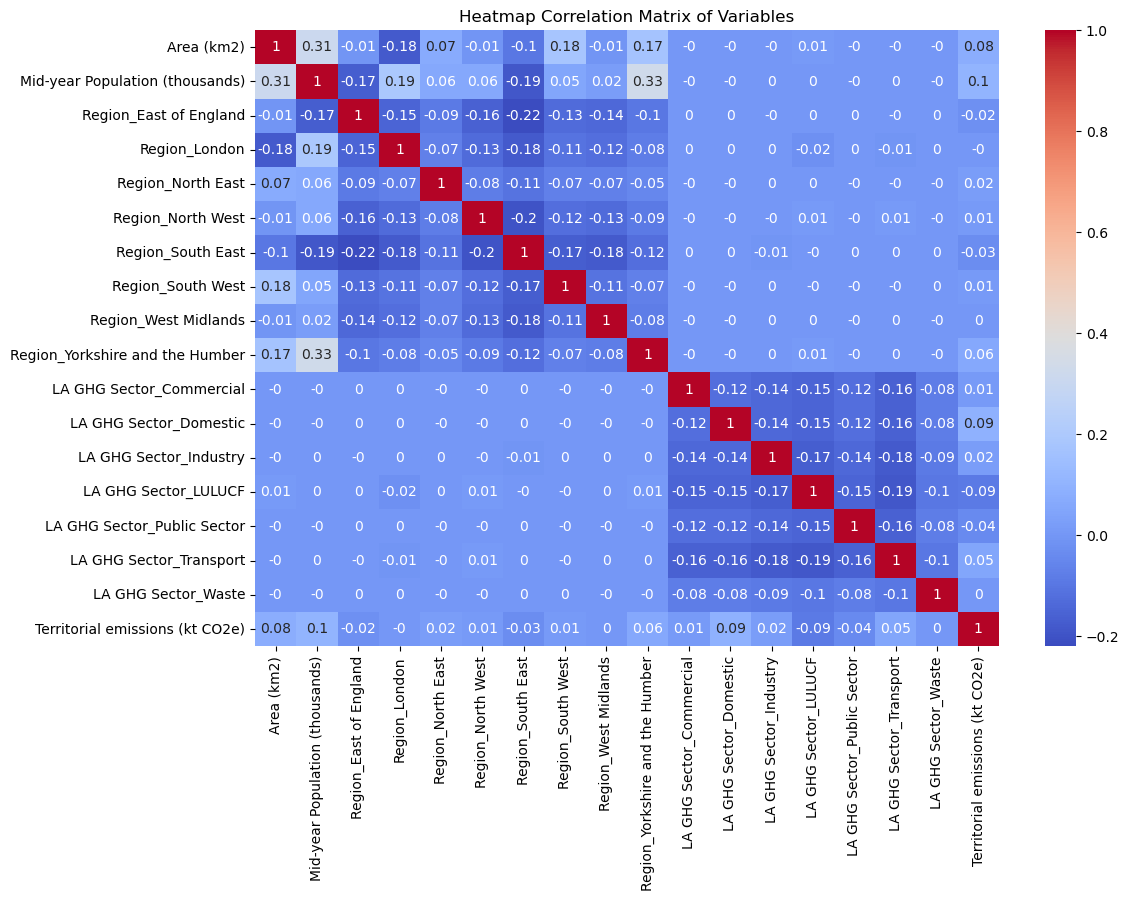

In [1672]:
#The drop_first=True argument ensures that one of the categories for each variable is dropped, 
# avoiding multicollinearity issues. The dropped category will act as the reference category.

#heat map
# Calculate the correlation matrix
corr_matrix = England_encoded[['Area (km2)', 'Mid-year Population (thousands)', 'Region_East of England', 
                               'Region_London', 'Region_North East', 'Region_North West', 'Region_South East', 
                               'Region_South West', 'Region_West Midlands', 'Region_Yorkshire and the Humber', 
                               'LA GHG Sector_Commercial', 'LA GHG Sector_Domestic', 'LA GHG Sector_Industry', 
                               'LA GHG Sector_LULUCF', 'LA GHG Sector_Public Sector', 'LA GHG Sector_Transport', 
                               'LA GHG Sector_Waste', 'Territorial emissions (kt CO2e)']].corr()

# Round the correlation matrix to 1 decimal place
corr_matrix_rounded = corr_matrix.round(2)

# Set the figure size to make the heatmap larger
plt.figure(figsize=(12, 8))

# Create the heatmap with the rounded correlation values
sns.heatmap(corr_matrix_rounded, annot=True, cmap='coolwarm')

plt.title('Heatmap Correlation Matrix of Variables')

# Show the plot
plt.show()



# sns.heatmap(England_encoded[['Area (km2)', 'Mid-year Population (thousands)', 'Region_East of England', 'Region_London', 'Region_North East', 'Region_North West', 'Region_South East', 'Region_South West', 'Region_West Midlands', 'Region_Yorkshire and the Humber', 'LA GHG Sector_Commercial', 'LA GHG Sector_Domestic', 'LA GHG Sector_Industry', 'LA GHG Sector_LULUCF', 'LA GHG Sector_Public Sector', 'LA GHG Sector_Transport', 'LA GHG Sector_Waste', 'Territorial emissions (kt CO2e)']].corr(), annot=True, cmap='coolwarm')
# plt.show()

In [1673]:
#regression
#includes all the variables!!!!!

# Define the independent variables (including area, population, and dummy variables for regions and sectors)
X = England_encoded[['Mid-year Population (thousands)', 'Area (km2)', 'Calendar Year'] + 
                    [col for col in England_encoded.columns if 'Region' in col or 'LA GHG Sector' in col]]

# Add the constant (intercept)
X = sm.add_constant(X)

# Define the dependent variable (GHG emissions)
y = England_encoded['Territorial emissions (kt CO2e)']

# Fit the OLS model
model = sm.OLS(y, X).fit()

# View the summary of the model
print(model.summary())


                                   OLS Regression Results                                  
Dep. Variable:     Territorial emissions (kt CO2e)   R-squared:                       0.036
Model:                                         OLS   Adj. R-squared:                  0.036
Method:                              Least Squares   F-statistic:                     903.9
Date:                             Sun, 15 Dec 2024   Prob (F-statistic):               0.00
Time:                                     13:44:16   Log-Likelihood:            -2.5447e+06
No. Observations:                           437065   AIC:                         5.090e+06
Df Residuals:                               437046   BIC:                         5.090e+06
Df Model:                                       18                                         
Covariance Type:                         nonrobust                                         
                                      coef    std err          t      P>|t|     

Variation inflation factor

In [1674]:
#vif
# 1. Add constant to the features for intercept (needed for VIF calculation)
X = add_constant(England_encoded.drop('Territorial emissions (kt CO2e)', axis=1))

# 2. Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display VIF values
print(vif_data)


                            Feature            VIF
0                             const  150895.608003
1                        Area (km2)       1.231155
2                     Calendar Year       1.004548
3   Mid-year Population (thousands)       1.422970
4            Region_East of England       1.933912
5                     Region_London       1.899806
6                 Region_North East       1.315360
7                 Region_North West       1.840395
8                 Region_South East       2.223598
9                 Region_South West       1.658669
10             Region_West Midlands       1.709693
11  Region_Yorkshire and the Humber       1.577443
12         LA GHG Sector_Commercial       1.510429
13           LA GHG Sector_Domestic       1.510429
14           LA GHG Sector_Industry       1.623735
15             LA GHG Sector_LULUCF       1.689803
16      LA GHG Sector_Public Sector       1.510429
17          LA GHG Sector_Transport       1.716935
18              LA GHG Sector_W

Forecasting

In [1675]:
# Step 1: Prepare the yearly emissions data
yearly_emissions=England.groupby(["Calendar Year"])[['Territorial emissions (kt CO2e)']].sum().reset_index()
yearly_emissions['Calendar Year'] = pd.to_datetime(yearly_emissions['Calendar Year'], format='%Y')
yearly_emissions['Territorial emissions (thousands kt CO2e)']= yearly_emissions['Territorial emissions (kt CO2e)']/1000

In [1676]:
yearly_emissions.head()

,Calendar Year,Territorial emissions (kt CO2e),Territorial emissions (thousands kt CO2e)
0,2005-01-01,509462.390716,509.462391
1,2006-01-01,504423.972896,504.423973
2,2007-01-01,492966.690978,492.966691
3,2008-01-01,478357.498931,478.357499
4,2009-01-01,437669.712405,437.669712


In [1677]:
# Split train and test

train = yearly_emissions.iloc[:-int(len(yearly_emissions) * 0.2)]

test = yearly_emissions.iloc[-int(len(yearly_emissions) * 0.2):]

 

 

def plot_func(forecast: list[float], title: str) -> None:

    """Function to plot the forecasts."""

    fig = go.Figure()

    fig.add_trace(go.Scatter(x=train['Calendar Year'], y=train['Territorial emissions (thousands kt CO2e)'], name='Train'))

    fig.add_trace(go.Scatter(x=test['Calendar Year'], y=test['Territorial emissions (thousands kt CO2e)'], name='Test'))

    fig.add_trace(go.Scatter(x=test['Calendar Year'], y=forecast, name='Forecast'))

    fig.update_layout(template="simple_white", font=dict(size=18), title_text=title,

                      width=1000, title_x=0.5, height=600, xaxis_title='Calendar Year',

                      yaxis_title='Territorial emissions (thousands kt CO2e)')

   

    return fig.show() 

# Fit model and get forecasts

#model = SimpleExpSmoothing(train['Territorial emissions (thousands kt CO2e)']).fit(optimized=True)
model = Holt(train['Territorial emissions (thousands kt CO2e)']).fit(optimized=True)

forecasts = model.forecast(len(test))

# Plot the forecasts
plot_func(forecasts, 'Holt’s Linear Trend Model')

In [1678]:
model.summary()

Dep. Variable:,Territorial emissions (thousands kt CO2e),No. Observations:,15
Model:,Holt,SSE,3537.472
Optimized:,True,AIC,89.947
Trend:,Additive,BIC,92.779
Seasonal:,None,AICC,100.447
Seasonal Periods:,None,Date:,"Sun, 15 Dec 2024"
Box-Cox:,False,Time:,13:44:24
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.6357042,alpha,True
smoothing_trend,0.1943767,beta,True


In [1679]:
# # Step 3: Forecast for the next 2 years
forecast_periods = 3
forecast = model.forecast(3)


In [1680]:
# Step 4: Prepare DataFrame for Forecasted Periods
last_date = yearly_emissions['Calendar Year'].iloc[-1]
forecast_dates = pd.date_range(last_date + pd.offsets.YearEnd(1), periods=forecast_periods, freq='YE')
forecast_df = pd.DataFrame({'Calendar Year': forecast_dates, 'Territorial emissions (thousands kt CO2e)': forecast})


In [1681]:
# Step 5: Combine Actual and Forecasted Data
all_data = pd.concat([
    yearly_emissions,
    forecast_df
]).reset_index(drop=True)


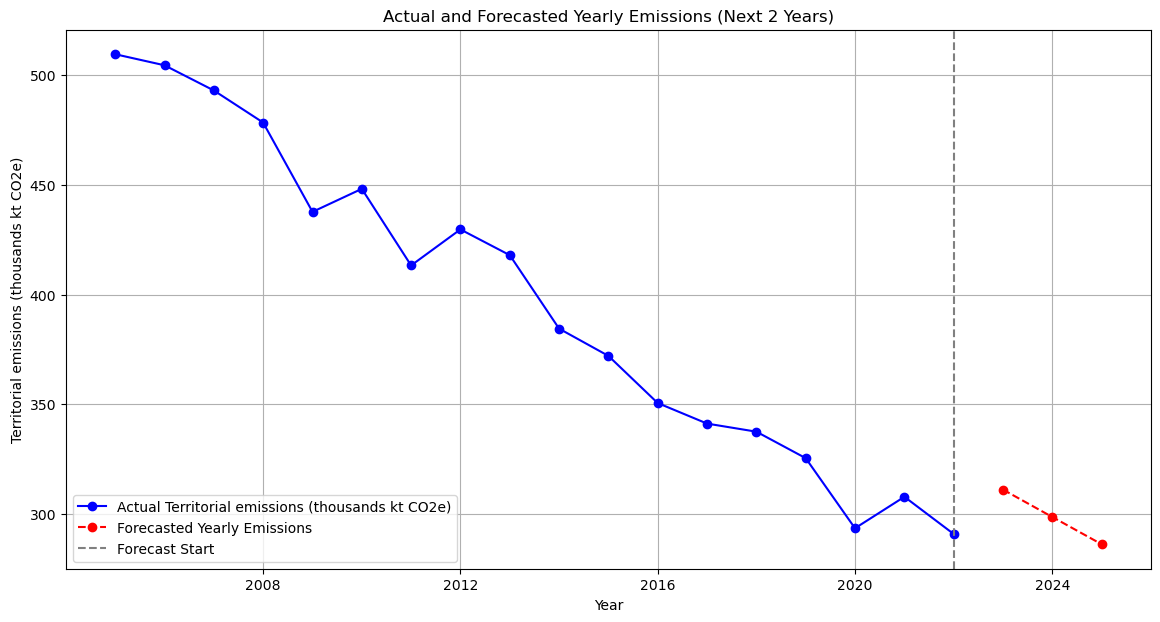

In [1682]:
# Step 6: Plot Actual and Forecasted Sales
plt.figure(figsize=(14, 7))
plt.plot(yearly_emissions['Calendar Year'], yearly_emissions['Territorial emissions (thousands kt CO2e)'], label='Actual Territorial emissions (thousands kt CO2e)', marker='o', color='b')
plt.plot(forecast_df['Calendar Year'], forecast_df['Territorial emissions (thousands kt CO2e)'], label='Forecasted Yearly Emissions', marker='o', linestyle='--', color='r')
plt.axvline(x=last_date, color='gray', linestyle='--', label='Forecast Start')
plt.title('Actual and Forecasted Yearly Emissions (Next 2 Years)')
plt.xlabel('Year')
plt.ylabel('Territorial emissions (thousands kt CO2e)')
plt.legend()
plt.grid(True)
plt.show()

#mayeb change y axis scale

In [1683]:
forecasted_values = model.forecast(3)

# Print the forecasted values
print(forecasted_values)

15    311.197882
16    298.752645
17    286.307407
dtype: float64
